## Hey There🖐, I will walk you through out the notebook. This Kernal is dedicated for **beginners**. Here you are going to obtain the predictive model with **~86% accurancy**. (Jump to [Content](#CONTENT) for overview of the notebook). So without further delay lets start.

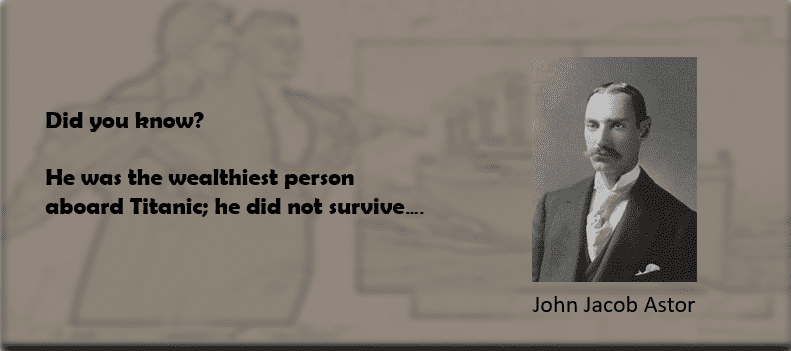

# **INTRODUCTION**

<li>The sinking of the Titanic is one of the most famous ships in history. On April 15, 1912, the Titanic sank after colliding with an iceberg while cruising, **killing 1,502 of its 2,224 passengers and crew**. The exciting event shocked the international community and led to better ship safety management.<\br>

<br><li>One of the reasons why these wrecks caused so many casualties was that there were **not enough lifeboats** for passengers and crew. While there is some chance of surviving the sinking, some groups, such as women, children, and the upper classes, are more likely to survive than others. Click [here](https://www.kaggle.com/competitions/titanic) to know more


# **PROBLEM STATEMENT**

* In this challenge, we have been asked to complete an analysis to see what kind of people will survive. We specifically asked to use ML algorithm to predict **which passengers will survive** the crash.


# **CONTENT**

1. Reading and Exploring data
> Importing train and test data into notebook and understand overview of data 
2. Preparing Data
> Outliers are trimmed out 
3. Exploratory Data Analysis
> Dig in deeper into the predictive nature of each attributes available in data set and 
> clean the data in such way that it could be used for modelling
4. Breifing Workdone
> Summarizing what has been done for each attributes to get clear picture
5. Modelling
> First, I splitted the train data intp 8:2 and fitted with models to check accurancy. the model with highest accuracy is selected for predicting survival in test data provided in competation
6. File Submission

In [1]:
#Libraries for computing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **READING AND EXPLORING DATA**

In [2]:
#reading train and test data into notebook
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')
full_data = pd.concat([train_data, test_data])

In [3]:
#Exploring data 
train_data.head(3).style.background_gradient(cmap='Greys')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S


<div class="alert alert-block alert-info">
An overview of data types:
<li>Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete), Survived(Discrete) </n>
<li>Categorical Features:  Sex, Embarked, Pclass
<li>Alphanumeric Features: Ticket, Cabin
</div>


In [4]:
#Understanding statistics of dataframe
train_data.describe(include='all').style.background_gradient(cmap='Greys')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Braund, Mr. Owen Harris",male,nan,nan,nan,347082,nan,B96 B98,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446.000000,0.383838,2.308642,nan,nan,29.699118,0.523008,0.381594,nan,32.204208,nan,nan
std,257.353842,0.486592,0.836071,nan,nan,14.526497,1.102743,0.806057,nan,49.693429,nan,nan
min,1.000000,0.000000,1.000000,nan,nan,0.420000,0.000000,0.000000,nan,0.000000,nan,nan
25%,223.500000,0.000000,2.000000,nan,nan,20.125000,0.000000,0.000000,nan,7.910400,nan,nan
50%,446.000000,0.000000,3.000000,nan,nan,28.000000,0.000000,0.000000,nan,14.454200,nan,nan
75%,668.500000,1.000000,3.000000,nan,nan,38.000000,1.000000,0.000000,nan,31.000000,nan,nan


<div class="alert alert-block alert-info">
<li>From PassengerId : There are a total of 891 passengers in our training set. Moreover this column doesnt share any correlation to target attribute.

<li>From Survived & SibSp & Parch & Fare: could possibly have outliers as std is greater than its mean value
</div>


In [5]:
#Exploring train data frame 
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
data_overview(train_data)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:891
Columns:12
------------------------------------------------------------ HEAD -----------------------------------------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embark

<div class="alert alert-block alert-info">
There are missing values in Age, Cabin and Embarked columns.
</div>

In [6]:
#Exploring test data frame
pd.set_option('display.max_columns', None) 
def data_overview(df, head=5):
    print(" SHAPE ".center(125,'-'))
    print('Rows:{}'.format(df.shape[0]))
    print('Columns:{}'.format(df.shape[1]))
    print(" HEAD ".center(125,'-'))
    print(df.head(head))
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)
    
data_overview(test_data)

----------------------------------------------------------- SHAPE -----------------------------------------------------------
Rows:418
Columns:11
------------------------------------------------------------ HEAD -----------------------------------------------------------
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0     

<div class="alert alert-block alert-info">
There are missing values in Age, Cabin, Fare columns.
</div>

# **PREPARING DATA (Outliers Removal)**

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

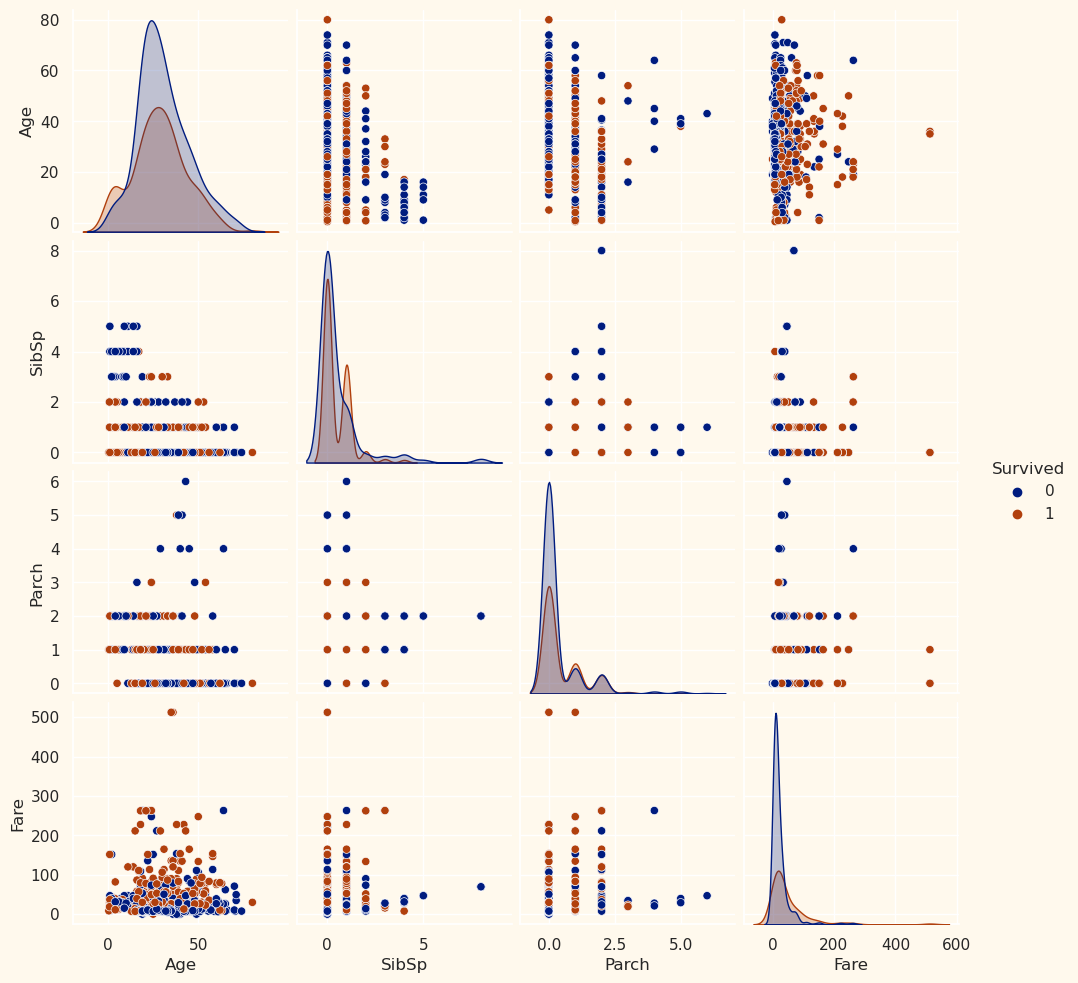

In [7]:
#Lets visialize the numerical continous features for outliers
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(train_data[[ "Survived","Age","SibSp", "Parch","Fare"]], hue= "Survived",palette= "dark")

In [8]:
#Dropping the outliers by setting a cap on SibSp and Fare. 
print("The total number of data-points before removing the outliers are:", len(train_data))
train_data = train_data[(train_data["SibSp"]<6)]
train_data = train_data[(train_data["Fare"]<350)]
train_data = train_data[(train_data["Parch"]<5)]
print("The total number of data-points after removing the outliers are:", len(train_data))

The total number of data-points before removing the outliers are: 891
The total number of data-points after removing the outliers are: 875


# **EXPLORATORY DATA ANALYSIS**

> objective is to get clear idea of each variables and establish selection criteria for modelling.

### 1. Pclass

In [9]:
print(" Number of passengers by their boarding class ".center(50,'-'))
print(train_data["Pclass"].value_counts())

-- Number of passengers by their boarding class --
3    478
1    213
2    184
Name: Pclass, dtype: int64


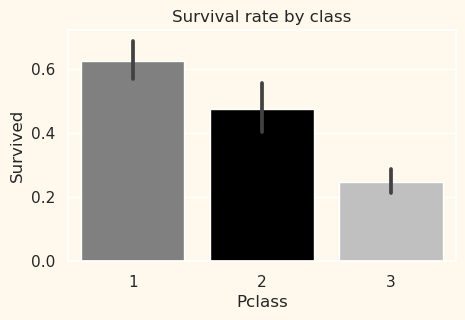

In [10]:
cols = ['grey','black','silver']
plt.figure(figsize=(5,3))   
sns.barplot(x = train_data["Pclass"], y = train_data["Survived"],palette=cols)
plt.title("Survival rate by class")
plt.show()

<div class="alert alert-block alert-info">
The survival rate increases with increase in boarding class. Noted that ~ 50% of passengers belongs to 3rd class. 
<li>Conclusion: Pclass to Include for building model alogrithm
</div>

### 2. Name

In [11]:
# Extracting salutation to check the correlation with Target 
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)

train_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                           'Rare Title', inplace = True)

train_data['Title'].replace(['the Countess', 'Lady', 'Sir'],'Honarary', inplace = True)

train_data['Title'].value_counts()


Mr            511
Miss          181
Mrs           121
Master         39
Rare Title     20
Honarary        3
Name: Title, dtype: int64

In [12]:
# repeating same for test data
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace = True)
test_data['Title'].replace(['Don', 'Rev', 'Dr', 'Major',  'Col', 'Capt', 'Jonkheer'],
                           'Rare Title', inplace = True)
test_data['Title'].replace(['the Countess', 'Lady', 'Sir','Dona'],'Honarary', inplace = True)
test_data['Title'].value_counts()

Mr            240
Miss           79
Mrs            72
Master         21
Rare Title      5
Honarary        1
Name: Title, dtype: int64

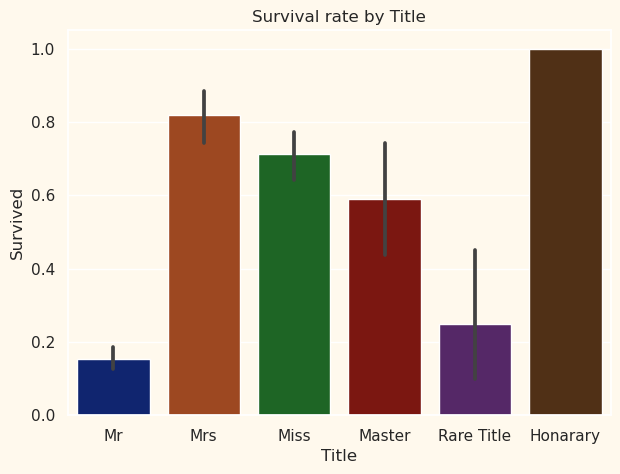

In [13]:
plt.figure(figsize=(7,5)) 
sns.barplot(x = train_data["Title"], y = train_data["Survived"],palette="dark")
plt.title("Survival rate by Title")
plt.show()

<div class="alert alert-block alert-info">
The survival rate is high for women ( Mrs and Ms) and common men (Mr) are least survived and to be noted that there were only 3 Honarary and all were rescued according to the record.
    <li> Conclusion: Title to include for building model alogrithm
</div>

In [14]:
#to include for modelling lets map each of the title groups to a numerical value (Encoding)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare Title": 5, "Honarary": 6}
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

In [15]:
#Dropping Name from both train and test
train_data = train_data.drop("Name",axis=1)
test_data = test_data.drop("Name",axis=1)
train_data.head(3).style.set_properties(subset=['Title'], **{'background-color': 'yellow'})

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.000000,1,0,A/5 21171,7.250000,nan,S,1
1,2,1,1,female,38.000000,1,0,PC 17599,71.283300,C85,C,3
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,2


### 3. Sex

In [16]:
train_data["Sex"].value_counts()

male      570
female    305
Name: Sex, dtype: int64

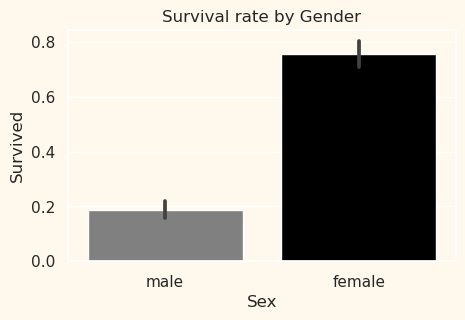

In [17]:
cols = ['grey','black']
plt.figure(figsize=(5,3))   
sns.barplot(x = train_data["Sex"], y = train_data["Survived"],palette=cols)
plt.title("Survival rate by Gender")
plt.show()

In [18]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize = 'index')

Survived,0,1
Sex,,
female,0.242623,0.757377
male,0.812281,0.187719


<div class="alert alert-block alert-info">
No doubt, Female has highest survival rate of ~75% compare to that of Men with ~ 20%.
    <li> Conclusion : Sex to include for building model alogrithm
</div>

In [19]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train_data['Sex'] = train_data['Sex'].map(sex_mapping)
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

train_data.head(3).style.set_properties(subset=['Sex'], **{'background-color': 'yellow'})

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.000000,1,0,A/5 21171,7.250000,nan,S,1
1,2,1,1,1,38.000000,1,0,PC 17599,71.283300,C85,C,3
2,3,1,3,1,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,2


### 4. Age

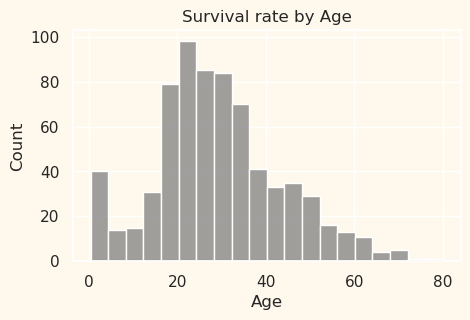

In [20]:
plt.figure(figsize=(5,3))   
sns.histplot(train_data["Age"],color="grey")
plt.title("Survival rate by Age")
plt.show()

#### Decision table for naming groups for Age:

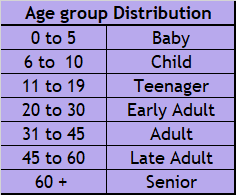

In [21]:
#replacing missing values with its Median 
train_data["Age"].replace(np.nan,train_data["Age"].median(), inplace=True)
test_data["Age"].replace(np.nan,test_data["Age"].median(), inplace=True)

#Bin names
bin_names=["Baby","Child","Teenager","Early Adult","Adult","Late Adult","Senior"]

#Sorting asc and drawing divider to the column
bins_train = np.linspace(min(train_data["Age"]),max(train_data["Age"]),8)
bins_test = np.linspace(min(test_data["Age"]),max(test_data["Age"]),8)

#dividing the column
train_data["Age_binned"] = pd.cut(train_data["Age"],bins_train,labels = bin_names,include_lowest=True)
test_data["Age_binned"] = pd.cut(test_data["Age"],bins_test,labels = bin_names,include_lowest=True)

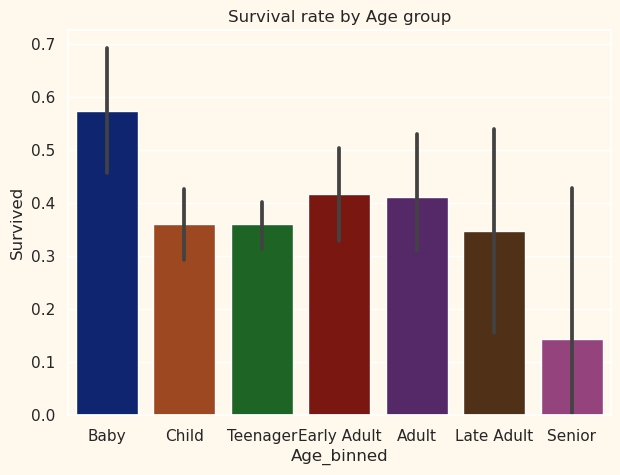

In [22]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Age group")
sns.barplot(x=train_data["Age_binned"],y=train_data["Survived"],palette="dark")
plt.show()


<div class="alert alert-block alert-info">
Babies with age group 1 to 5 is most likely to Survive
    <li> Conclusion :  Conclusion: Age to Include for building model alogrithm
</div>

In [23]:
# Converting to numerical data
title_mapping = {"Baby":1,"Child":2,"Teenager":3,"Early Adult":4,"Adult":5,"Late Adult":6,"Senior": 7}
train_data["Age_binned"] = train_data["Age_binned"].map(title_mapping)
test_data["Age_binned"] = test_data["Age_binned"].map(title_mapping)
train_data = train_data.drop("Age",axis=1)
test_data = test_data.drop("Age",axis=1)

### 5. SibSp

In [24]:
train_data["SibSp"].value_counts()

0    603
1    205
2     28
4     18
3     16
5      5
Name: SibSp, dtype: int64

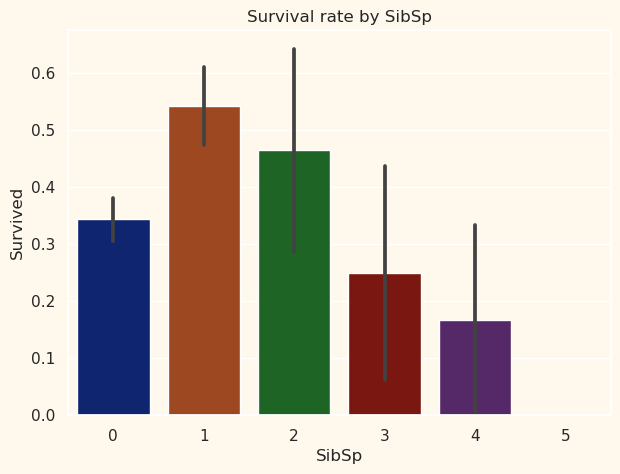

In [25]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by SibSp")
sns.barplot(x=train_data["SibSp"],y=train_data["Survived"],palette='dark')
plt.show()

<div class="alert alert-block alert-info">
Here it is clear that people with 1 or 2 siblings or spouses are most likely to surivive.In contradictory to previous, the person with higher than 2 siblings or spouses is less likely to survive and it applies same for the one who has no spouses or siblings. 
    <li> Conclusion: SibSp to Include for building model alogrithm
</div>

### 6. Parch

In [26]:
train_data["Parch"].value_counts()

0    676
1    117
2     73
3      5
4      4
Name: Parch, dtype: int64

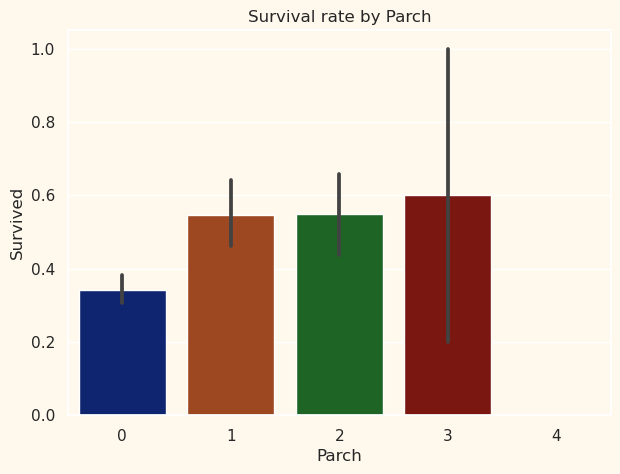

In [27]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Parch")
sns.barplot(x=train_data["Parch"],y=train_data["Survived"],palette='dark')
plt.show()

<div class="alert alert-block alert-info">
People with 1-3 parents or Childern have relatively higher survival rate otherwise its low.
    <li> Conclusion: ParCh to Include for building model alogrithm
</div>

### 7. Ticket and Cabin

In [28]:
# Considering to drop these two columns as Tikect dont contribute any information to predictive model and Cabin has ~80% missing values.
to_drop = ["Ticket","Cabin"]
train_data = train_data.drop(to_drop,axis=1)
test_data = test_data.drop(to_drop,axis=1)

<div class="alert alert-block alert-info">
Considering to drop these two columns as Tikect dont contribute any information to predictive model and Cabin has ~80% missing
    <li> Conclusion: Ticket and Cabin Variables to exculded for Modelling

### 8. Fare

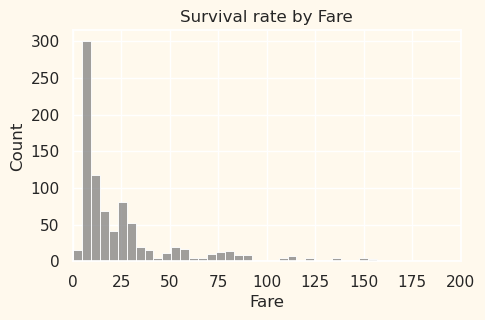

In [29]:
plt.figure(figsize=(5,3))  
plt.title("Survival rate by Fare")
plt.xlim(0,200)
sns.histplot(train_data["Fare"],color="grey")
plt.show()

In [30]:
#Replacig missing value with median in test data
test_data["Fare"].replace(np.nan,test_data["Fare"].median(), inplace=True)

In [31]:
labels = ["low","mid","standard","premium","gold"]
train_data['Fare_binned'] = pd.qcut(train_data['Fare'],5,labels=labels)
test_data['Fare_binned'] = pd.qcut(test_data['Fare'], 5,labels=labels)
train_data['Fare_binned'].value_counts()

mid         184
low         179
gold        173
premium     172
standard    167
Name: Fare_binned, dtype: int64

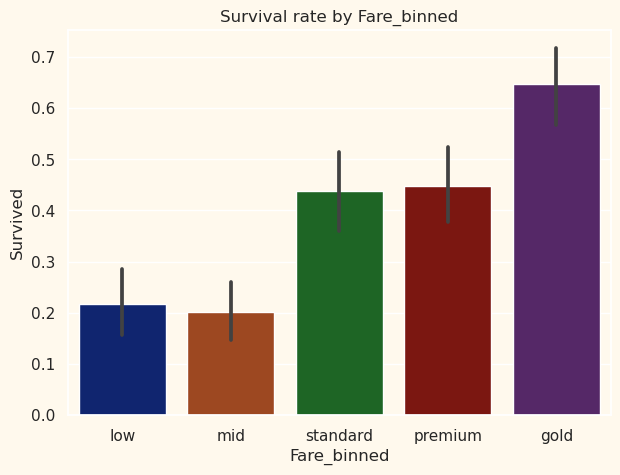

In [32]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Fare_binned")
sns.barplot(x=train_data["Fare_binned"],y=train_data["Survived"],palette='dark')
plt.show()

<div class="alert alert-block alert-info">
After binning Fare it is abvious that higher the fare price is higher will be the survival chance.
    <li> Conclusion: Fare_binned to include for Modelling

In [33]:
# Converting to numerical data
fare_mapping = {"low":1,"mid":2,"standard":3,"premium":4,"gold":5}
train_data["Fare_binned"] = train_data["Fare_binned"].map(fare_mapping)
test_data["Fare_binned"] = test_data["Fare_binned"].map(fare_mapping)
train_data = train_data.drop("Fare",axis=1)
test_data = test_data.drop("Fare",axis=1)

### 8. Embarked


In [34]:
train_data["Embarked"].value_counts()

S    632
C    165
Q     76
Name: Embarked, dtype: int64

In [35]:
#Replacing missing values from train data with frequency to embarked column
train_data["Embarked"].replace(np.nan, train_data["Embarked"].mode()[0], inplace=True)

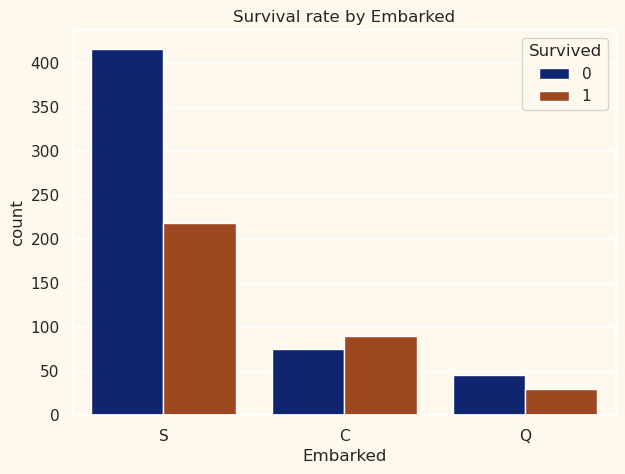

In [36]:
plt.figure(figsize=(7,5))
plt.title("Survival rate by Embarked")
sns.countplot(x="Embarked",hue ="Survived", data =train_data,palette='dark')
plt.show()

<div class="alert alert-block alert-info">
People who boarded the ship from Cherbourg has higher survival rate when comapre to survival rate of other points. 
    <li> Conclusion: Embarked Variables to include for Modelling
</div>

In [37]:
Embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(Embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(Embarked_mapping)

### Finally this is how data looks

In [38]:
cm = sns.light_palette("green", as_cmap=True)
train_data.head().style.background_gradient(cmap=cm).set_precision(2)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,1,0,3,0,1,0,1,1,2,1
1,2,1,1,1,1,0,2,3,4,5
2,3,1,3,1,0,0,1,2,3,2
3,4,1,1,1,1,0,1,3,4,5
4,5,0,3,0,0,0,1,1,4,2


In [39]:
cm = sns.light_palette("red", as_cmap=True)
test_data.head().style.background_gradient(cmap=cm).set_precision(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,892,3,0,0,0,3,1,4,2
1,893,3,1,1,0,1,3,5,1
2,894,2,0,0,0,3,1,6,2
3,895,3,0,0,0,1,1,3,2
4,896,3,1,1,1,1,3,3,3


#  **BREIFING WORKDONE**

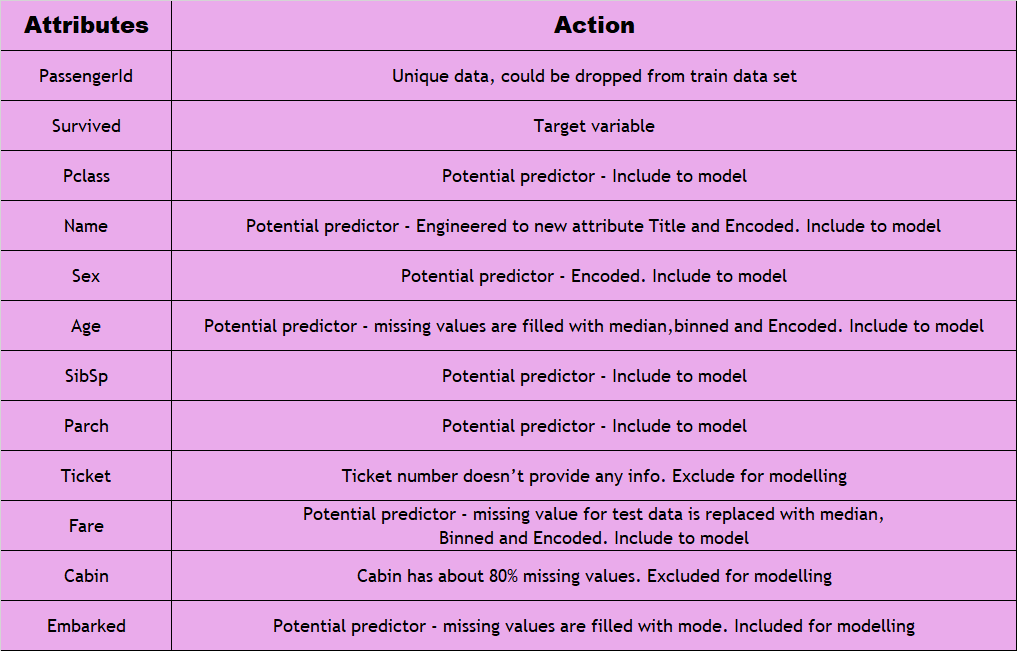

### Splitting and Scaling data

In [40]:
X = train_data[train_data.columns[~train_data.columns.isin(['PassengerId','Survived'])]]
Y = train_data["Survived"] # Target Variable
scaler = StandardScaler()
X.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,3,0,1,0,1,1,2,1
1,1,1,1,0,2,3,4,5
2,3,1,0,0,1,2,3,2


In [41]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled) # Predictor
X_scaled.columns = ["Pclass","Sex","SibSp","Parch","Embarked","Title","Age_binned","Fare_binned"]
X_scaled.head(3).style.set_properties(**{'background-color': 'black',
                           'color': 'green'})

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,0.834443,-0.731497,0.605520,-0.485428,-0.569454,-0.696416,-0.909513,-1.389532
1,-1.559451,1.367060,0.605520,-0.485428,1.002382,1.222841,0.805625,1.428175
2,0.834443,1.367060,-0.524181,-0.485428,-0.569454,0.263212,-0.051944,-0.685105


# **MODELLING**

In [42]:
# To check Accurancy of different model, spliting Train_data into 80 % train and 20 % test is required.
x_train, x_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=1)

I will be testing the following models with my training data (got the list from [here](https://www.kaggle.com/code/nadintamer/titanic-survival-predictions-beginner)):

1. Gaussian Naive Bayes
2. Logistic Regression
3. Support Vector Machines
4. Perceptron
5. Decision Tree Classifier
6. Random Forest Classifier
7. KNN or k-Nearest Neighbors
8. Stochastic Gradient Descent
9. Gradient Boosting Classifie

In [43]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
ypred_gaussian = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(ypred_gaussian, y_test) * 100, 2)
print(acc_gaussian)

83.43


In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(x_train, y_train)
ypred_logReg = logReg.predict(x_test)
acc_logReg = round(accuracy_score(ypred_logReg, y_test) * 100, 2)
print(acc_logReg)

81.71


In [45]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
ypred_svc = svc.predict(x_test)
acc_svc = round(accuracy_score(ypred_svc, y_test) * 100, 2)
print(acc_svc)

85.71


In [46]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
ypred_perceptron = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(ypred_perceptron, y_test) * 100, 2)
print(acc_perceptron)

73.14


In [47]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
ypred_decisiontree = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(ypred_decisiontree, y_test) * 100, 2)
print(acc_decisiontree)

84.0


In [48]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
ypred_randomforest = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(ypred_randomforest, y_test) * 100, 2)
print(acc_randomforest)

85.14


In [49]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
ypred_knn = knn.predict(x_test)
acc_knn = round(accuracy_score(ypred_knn, y_test) * 100, 2)
print(acc_knn)

85.14


In [50]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
ypred_sgd = sgd.predict(x_test)
acc_sgd = round(accuracy_score(ypred_sgd, y_test) * 100, 2)
print(acc_sgd)

78.86


In [51]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
ypred_gbk = gbk.predict(x_test)
acc_gbk = round(accuracy_score(ypred_gbk, y_test) * 100, 2)
print(acc_gbk)

84.0


In [52]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logReg, 
              acc_randomforest, acc_gaussian, acc_perceptron, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False).style.highlight_max(axis=0)

,Model,Score
0,Support Vector Machines,85.710000
1,KNN,85.140000
3,Random Forest,85.140000
6,Decision Tree,84.000000
8,Gradient Boosting Classifier,84.000000
4,Naive Bayes,83.430000
2,Logistic Regression,81.710000
7,Stochastic Gradient Descent,78.860000
5,Perceptron,73.140000


# **PREDICTION & FILE SUBMISSION**

In [53]:
#scaling test data
test_id = test_data['PassengerId'] 
predictors = test_data[test_data.columns[~test_data.columns.isin(['PassengerId'])]]
scaler_test = StandardScaler()
predictors.head(3)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,3,0,0,0,3,1,4,2
1,3,1,1,0,1,3,5,1
2,2,0,0,0,3,1,6,2


In [54]:
predictors_scaled = scaler_test.fit_transform(predictors)
predictors_scaled = pd.DataFrame(predictors_scaled) # Predictor
predictors_scaled.columns = ["Pclass","Sex","SibSp","Parch","Embarked","Title","Age_binned","Fare_binned"]
predictors_scaled.head(3).style.set_properties(**{'background-color': 'black',
                           'color': 'green'})

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_binned,Fare_binned
0,0.873482,-0.755929,-0.499470,-0.400248,2.243165,-0.733897,0.652641,-0.703316
1,0.873482,1.322876,0.616992,-0.400248,-0.677841,1.238893,1.507826,-1.408319
2,-0.315819,-0.755929,-0.499470,-0.400248,2.243165,-0.733897,2.363011,-0.703316


In [55]:
#Using SVM for Prediction
predictions = svc.predict(predictors_scaled)
#set the output as a dataframe and convert to csv file named submission.csv
#output = pd.DataFrame({ 'PassengerId' : p_id, 'Survived': predictions })
#output.to_csv('submission.csv', index=False)

## **Need your vote to fuel this creative fire! UPVOTE if you're on board with innovation in feild of Data Science. 💥**

Checkout my other notebooks on [Marketing](https://www.kaggle.com/code/adarshcgowda/simplified-segmentation-rfm-kmeans) and [Used Card](https://www.kaggle.com/code/adarshcgowda/car-used-price-prediction-95-accuracy)